In [269]:
from __future__ import division, print_function
from functools import partial, reduce
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fitpack
import interface
import obslib.sidis.reader
import obslib.sidis.stfuncs
from qcdlib.aux import AUX
from tools.config import conf
%matplotlib inline

In [270]:
def get_data():
    # Merge all of the data tables
    return reduce(partial(pd.DataFrame.merge, how="outer"), map(pd.DataFrame, conf["sidis tabs"].values()))

In [271]:
input_file = "../inputs_alexei_gk/upol_hermes_no_filters.py"

CUTMIN = 0.99
CUTMAX = 5.28

filterstr = "dy>"
#filterstr = "yh_minus_yp>"

In [272]:
interface.gen_config(input_file)

In [273]:
conf["datasets"]["sidis"]["filters"][0]

''

In [274]:
interface.gen_config(input_file)  # Read file

conf["datasets"]["sidis"]["filters"][0] = filterstr + str(CUTMIN)  # Apply filter with min cut

conf["aux"] = AUX()
conf["sidis tabs"] = obslib.sidis.reader.READER().load_data_sets("sidis")
conf['sidis stfuncs'] = obslib.sidis.stfuncs.STFUNCS()

data = get_data().sort_values("dy")

loading sidis data sets 1007

In [275]:
data["yh_minus_yp"] = data["yh"] - data["yp"] 

In [276]:
print(", ".join(sorted(data.columns)))

Ebeam, F2, Q2, W2, col, dy, hadron, i, obs, pT, stat_u, systabs_u, systole, systrel, target, value, x, y, yh, yh_minus_yp, yp, z


In [277]:
data["QCUT"] = data["pT"] / data["z"] / (data["Q2"] ** 0.5)

In [314]:

def custom_label(label):
    if label =="Q2":
        label="$Q^2$"
    if label =="qT":
        label="$q_T$"
    if label =="pT":
        label="$P_{hT}$"
    if label =="qToverQ":
        label="$q_T/Q$"
    if label =="qToverQ2":
        label="$q_T^2/Q^2$"
    if label =="dy":
        label="$y_p-y_h$"
    if label =="yh_minus_yp":
        label="$y_h-y_p$"
    return label

def color_plot(data,vert_lab, hor_lab, cmap="plasma", alpha=1.0):
    vert = data[vert_lab].values
    hor = data[hor_lab].values

    data_q = data["QCUT"]

    colors = (data_q - min(data_q)) / (max(data_q) - min(data_q))  # XXX
    
    fig, ax = plt.subplots()

    #ax.set_title(custom_label(vert_lab) + " vs. " + custom_label(hor_lab))
    ax.set_ylabel(custom_label(vert_lab))
    ax.set_xlabel(custom_label(hor_lab))

    ax.scatter(hor, vert, c=colors, cmap=plt.get_cmap(cmap), alpha=alpha)
    
    #heatmap = ax.pcolor(data_q, cmap=plt.get_cmap(cmap)) # heatmap 
    #plt.colorbar(heatmap)

    fig.tight_layout()
    
    return fig, ax, vert, hor

In [279]:
data["qT"] = data["pT"] / data["z"]
data["qToverQ"] = data["pT"] / data["z"]/(data["Q2"]**0.5)
data["qToverQ2"] = (data["pT"] / data["z"])**2/(data["Q2"])

qT vs. qToverQ2
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qT vs. Q2
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 54

qT vs. dy
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qT vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qToverQ2 vs. Q2
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 54

qToverQ2 vs. dy
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qToverQ2 vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

Q2 vs. dy
Number of points: 2660
Unique vertical values: 54
Unique horizontal values: 2660

Q2 vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 54
Unique horizontal values: 2660

dy vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660



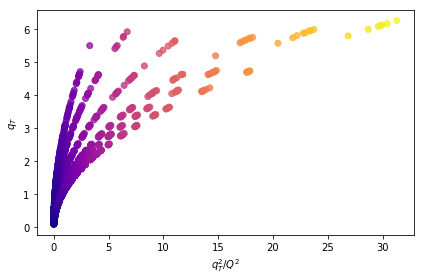

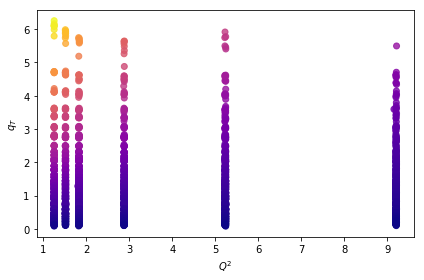

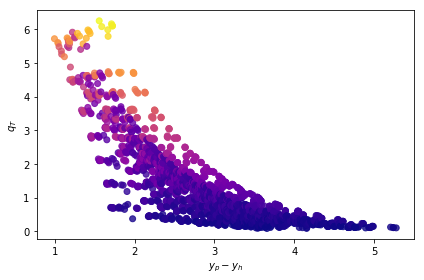

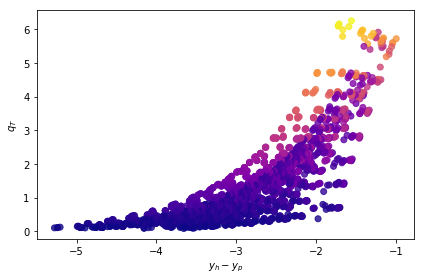

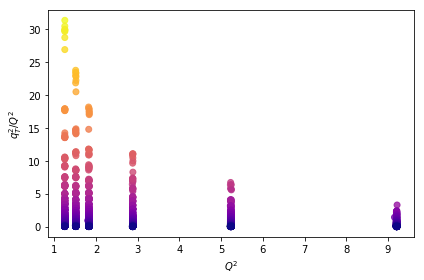

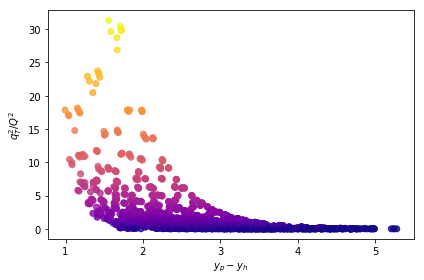

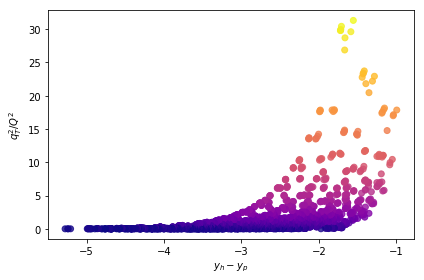

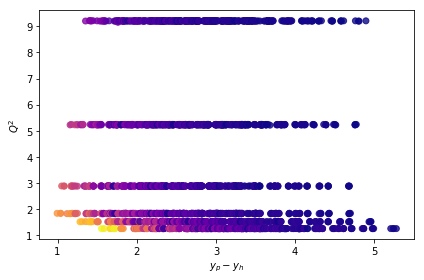

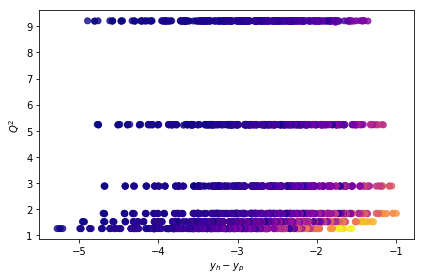

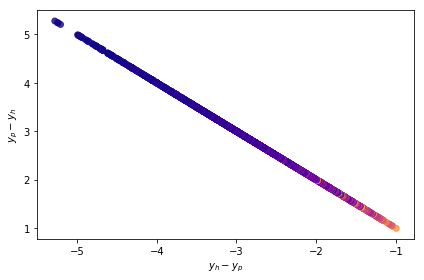

In [280]:
# labels = ("Q2", "pT", "x", "y", "z")
labels = ("qT","qToverQ2","Q2","dy","yh_minus_yp")

for v, h in combinations(labels, 2):
    fig, ax, vert, hor = color_plot(data,v, h, alpha=0.8)

    print(v + " vs. " + h)
    print("Number of points:", len(vert))
    print("Unique vertical values:", len(set(vert)))
    print("Unique horizontal values:", len(set(hor)))
    print()

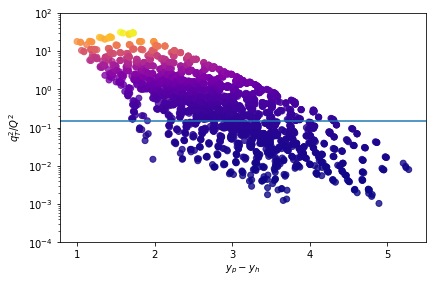

In [281]:
fig, ax, vert, hor = color_plot(data,"qToverQ2", "dy", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
plt.axhline(0.15,0,6)
plt.show()

In [297]:
torino_data = data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9")

In [299]:
normal_length = len(torino_data)

len(torino_data.query("pT/z>=0.5*Q2**0.5"))

667

In [300]:
len(torino_data)

978

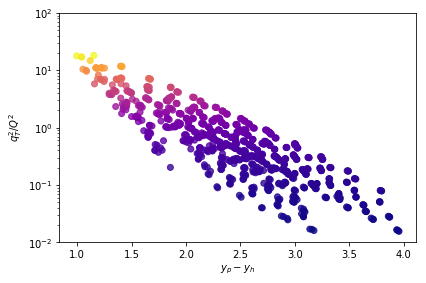

In [307]:
fig, ax, vert, hor = color_plot(torino_data,"qToverQ2", "dy", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01,100])
#plt.axhline(0.15,0,6)
plt.savefig("hermes_data_torino.pdf")
plt.show()


In [295]:
cut_data_qt = data.query("z>0.2 and z<0.6 and Q2>1.69 and (pT/z)**2<=0.15*Q2")

In [286]:
len(cut_data_qt)

379

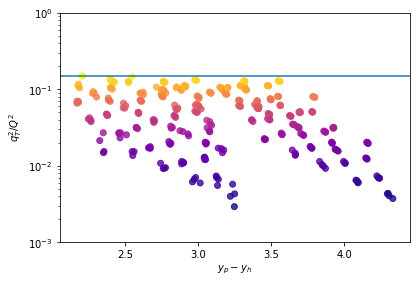

In [319]:
fig, ax, vert, hor = color_plot(cut_data_qt,"qToverQ2", "dy", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.001,1])
plt.axhline(0.15,0,6)
plt.savefig("hermes_data_new.pdf")
plt.show()


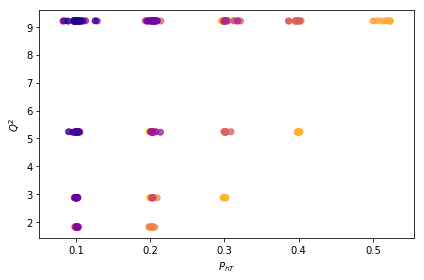

In [320]:
fig, ax, vert, hor = color_plot(cut_data_qt,"Q2", "pT", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,100])
#plt.axhline(0.15,0,6)
plt.savefig("hermes_data_new_pt.pdf")
plt.show()


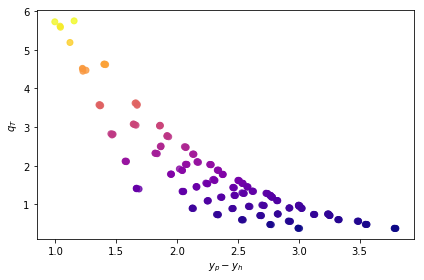

In [329]:
torino_data_x = data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9 and x< 0.1")
fig, ax, vert, hor = color_plot(torino_data_x,"qT", "dy", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.01,100])
#plt.axhline(0.15,0,6)
plt.show()

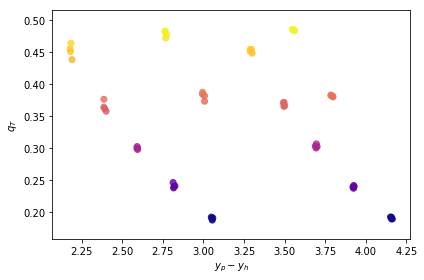

In [328]:
cut_data_qt_x = data.query("z>0.2 and z<0.6 and Q2>1.69 and (pT/z)**2<=0.15*Q2 and x<0.1")
fig, ax, vert, hor = color_plot(cut_data_qt_x,"qT", "dy", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.01,100])
#plt.axhline(0.15,0,6)
plt.show()